In [25]:
import pandas as pd
import numpy as np
import seaborn as sns

from mpl_toolkits import mplot3d
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

In [4]:
#!pip install seaborn

In [2]:
def initial_preproc(df):
    df = df.drop(["network", "seed"], axis=1)
    df = df.replace({2147483647 : 0})
    return df

In [13]:
RESULTS_FOLDER = "../results/"
EXPERIMENT_FILE_HEADER = "experiment_results_"
EXPERIMENT_FILE_ENDING = ".csv"
networks = ["alarm", "barley", "child", "hailfinder", "hepar2", "insurance", "mildew", "water", "win95pts"]
files = [RESULTS_FOLDER + EXPERIMENT_FILE_HEADER + net + EXPERIMENT_FILE_ENDING for net in networks]

In [26]:
file = "../results/results.csv"
df = pd.read_csv(file)

In [29]:
df.columns

Index(['algorithm', ' network', ' bbdd', ' threads', ' interleaving', ' seed',
       ' SHD', ' LL Score', ' BDeu Score', ' dfMM', ' dfMM plus',
       ' dfMM minus', ' Total iterations', ' Total time(s)'],
      dtype='object')

In [31]:
df.groupby(["algorithm", " network", " bbdd"," threads", " interleaving"]).mean()

seed  \
algorithm       network      bbdd                threads  interleaving          
GES_BNBuilder  res/alarm    alarm.xbif50001246_ 1        -1              -1.0   
                            alarm.xbif50001_    1        -1              -1.0   
                            alarm.xbif50002_    1        -1              -1.0   
                            alarm.xbif50003_    1        -1              -1.0   
                            alarm.xbif50004_    1        -1              -1.0   
...                                                                       ...   
PGESwithStages res/win95pts win95pts.xbif_      6         10             12.9   
                                                          15             12.9   
                                                8         5              12.9   
                                                          10             12.9   
                                                          15             12.9   

                                                                          SHD  \
algorithm       network      bbdd                threads  interleaving          
GES_BNBuilder  res/alarm    alarm.xbif50001246_ 1        -1              17.0   
                            alarm.xbif50001_    1        -1              18.0   
                            alarm.xbif50002_    1        -1              17.0   
                            alarm.xbif50003_    1        -1              19.0   
                            alarm.xbif50004_    1        -1              19.0   
...                                                                       ...   
PGESwithStages res/win95pts win95pts.xbif_      6         10            112.4   
                                                          15            123.2   
                                                8         5             117.9   
                                                          10            122.1   
                                                          15            113.1   

                                                                         LL Score  \
algorithm       network      bbdd                threads  interleaving              
GES_BNBuilder  res/alarm    alarm.xbif50001246_ 1        -1             -0.286154   
                            alarm.xbif50001_    1        -1             -0.286201   
                            alarm.xbif50002_    1        -1             -0.285593   
                            alarm.xbif50003_    1        -1             -0.286873   
                            alarm.xbif50004_    1        -1             -0.287314   
...                                                                           ...   
PGESwithStages res/win95pts win95pts.xbif_      6         10            -0.227497   
                                                          15            -0.225287   
                                                8         5             -0.227068   
                                                          10            -0.224594   
                                                          15            -0.229536   

                                                                          BDeu Score  \
algorithm       network      bbdd                threads  interleaving                 
GES_BNBuilder  res/alarm    alarm.xbif50001246_ 1        -1            -57421.418196   
                            alarm.xbif50001_    1        -1            -56677.049848   
                            alarm.xbif50002_    1        -1            -56901.396311   
                            alarm.xbif50003_    1        -1            -56762.677446   
                            alarm.xbif50004_    1        -1            -57074.500530   
...                                                                              ...   
PGESwithStages res/win95pts win95pts.xbif_      6         10           -50003.469582   
                                                          15       

<AxesSubplot:xlabel=' Total time(s)', ylabel=' BDeu Score'>

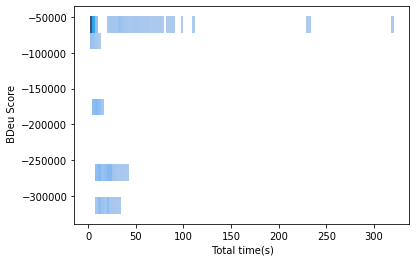

In [35]:
sns.histplot(df.groupby(["algorithm", " network", " bbdd"," threads", " interleaving"]).mean(),x=" Total time(s)", y=" BDeu Score")

In [14]:
files

['../results/experiment_results_alarm.csv',
 '../results/experiment_results_barley.csv',
 '../results/experiment_results_child.csv',
 '../results/experiment_results_hailfinder.csv',
 '../results/experiment_results_hepar2.csv',
 '../results/experiment_results_insurance.csv',
 '../results/experiment_results_mildew.csv',
 '../results/experiment_results_water.csv',
 '../results/experiment_results_win95pts.csv']

In [ ]:
def read_csv_preproc(file):
    df = pd.read_csv(file)
    #df_pges = df.loc[df.algorithm == "PGESwithStages"]
    #df_ges = df.loc[df.algorithm == "GES_BNBuilder"] 
    #df["delta_BDeu_Score"] = 
    df.loc[df.algorithm == "GES_BNBuilder"]
    

In [24]:
file = files[0] # alarm
df = pd.read_csv(file) 
print(df.columns)
#df.loc[df.algorithm == "GES_BNBuilder"].drop(["threads", "interleaving", "seed"]).head()


Index(['algorithm', ' network', ' bbdd', ' threads', ' interleaving', ' seed',
       ' SHD', ' LL Score', ' BDeu Score', ' dfMM', ' dfMM plus',
       ' dfMM minus', ' Total iterations', ' Total time(s)'],
      dtype='object')


In [ ]:
read_csv_preproc(files[0])

In [15]:
dfs = [pd.read_csv(file) for file in files]
df_total = pd.concat(dfs)
df_total.reset_index()

In [17]:
df_total.shape

(14925, 14)

In [18]:
df_total.head()

algorithm    network         bbdd   threads   interleaving   seed  \
0  PGESwithStages  res/alarm  alarm.xbif_       1.0           10.0   29.0   
1  PGESwithStages  res/alarm  alarm.xbif_       1.0           15.0    3.0   
2  PGESwithStages  res/alarm  alarm.xbif_       1.0           15.0    2.0   
3  PGESwithStages  res/alarm  alarm.xbif_       1.0           15.0    7.0   
4  PGESwithStages  res/alarm  alarm.xbif_       1.0           15.0   11.0   

    SHD   LL Score    BDeu Score       dfMM   dfMM plus   dfMM minus  \
0  21.0  -0.442923 -56840.814006  27.338052    8.291506    19.046547   
1  19.0  -0.408571 -56802.793706  24.365079    7.750965    16.614114   
2  15.0  -0.425976 -56770.694648  18.496353    3.581081    14.915272   
3  20.0  -0.468367 -57087.230943  26.655942    6.959459    19.696482   
4  21.0  -0.444735 -56884.890676  27.338052    8.291506    19.046547   

    Total iterations   Total time(s)  
0                7.0             3.0  
1                6.0             3.0  
2                6.0             3.0  
3                6.0             3.0  
4                6.0             3.0

In [12]:
df_pges = df.loc[df.algorithm == "PGESwithStages"]
df_ges = df.loc[df.algorithm == "GES_BNBuilder"]

In [5]:
#!pip3 install git+https://github.com/statsmodels/statsmodels.git

In [7]:
#from scipy.stats import norm
#from statsmodels.stats import shapiro
#my_data = norm.rvs(size=500)
#shapiro(my_data)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x13e24fa90>,
      dtype=object)

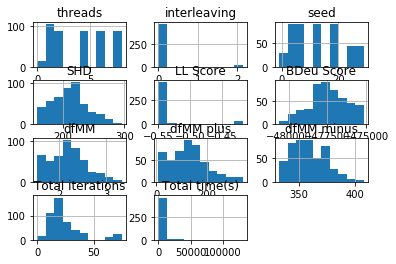

In [8]:
df.loc[df.bbdd == "andes.xbif_"].hist()

In [9]:
df["Total iterations"].max()

83

In [10]:
df = initial_preproc(df)

In [11]:
df_means = df.groupby(["bbdd","algorithm","threads","interleaving"],as_index=False).mean()

In [12]:
df_errors = df.groupby(["bbdd","algorithm","threads","interleaving"],as_index=False).std()
df_errors.head()

bbdd algorithm  threads  interleaving        SHD  LL Score  \
0  andes.xbif50001246_       ges        0             0   0.000000  0.000000   
1  andes.xbif50001246_        hc        1             5   0.000000  0.000000   
2  andes.xbif50001246_        hc        1            10   0.000000  0.000000   
3  andes.xbif50001246_        hc        1            15   0.000000  0.000000   
4  andes.xbif50001246_   pfhcbes        1             5  15.543487  0.003157   

   BDeu Score      dfMM  dfMM plus  dfMM minus  Total iterations  \
0    0.000000  0.000000   0.000000    0.000000          0.000000   
1    0.000000  0.000000   0.000000    0.000000          0.000000   
2    0.000000  0.000000   0.000000    0.000000          0.000000   
3    0.000000  0.000000   0.000000    0.000000          0.000000   
4  754.856255  0.217603  43.217795    8.044322          1.791957   

   Total time(s)  
0      29.751030  
1      23.462736  
2      44.005681  
3      42.951135  
4    1544.369630

In [13]:
#df_means = df_means.set_index("bbdd")

In [14]:
df_means.head()

bbdd algorithm  threads  interleaving    SHD  LL Score  \
0  andes.xbif50001246_       ges        0             0  184.0 -0.418203   
1  andes.xbif50001246_        hc        1             5  220.0 -0.419408   
2  andes.xbif50001246_        hc        1            10  220.0 -0.419408   
3  andes.xbif50001246_        hc        1            15  227.0 -0.419885   
4  andes.xbif50001246_   pfhcbes        1             5  192.6 -0.543905   

      BDeu Score      dfMM  dfMM plus  dfMM minus  Total iterations  \
0 -475617.345902  1.856502       72.0       342.0               0.0   
1 -477521.034447  2.358744      156.0       370.0              71.0   
2 -477521.034447  2.358744      156.0       370.0              36.0   
3 -477939.504157  2.403587      158.0       378.0              25.0   
4 -476572.090006  1.975785       91.0       349.6              71.9   

   Total time(s)  
0     651.466667  
1    1902.000000  
2    1887.000000  
3    1993.600000  
4    2817.000000

In [15]:
df_prueba = df_means.loc[df_means["bbdd"] == "andes.xbif50001246_"]

In [16]:
df_prueba.head()

bbdd algorithm  threads  interleaving    SHD  LL Score  \
0  andes.xbif50001246_       ges        0             0  184.0 -0.418203   
1  andes.xbif50001246_        hc        1             5  220.0 -0.419408   
2  andes.xbif50001246_        hc        1            10  220.0 -0.419408   
3  andes.xbif50001246_        hc        1            15  227.0 -0.419885   
4  andes.xbif50001246_   pfhcbes        1             5  192.6 -0.543905   

      BDeu Score      dfMM  dfMM plus  dfMM minus  Total iterations  \
0 -475617.345902  1.856502       72.0       342.0               0.0   
1 -477521.034447  2.358744      156.0       370.0              71.0   
2 -477521.034447  2.358744      156.0       370.0              36.0   
3 -477939.504157  2.403587      158.0       378.0              25.0   
4 -476572.090006  1.975785       91.0       349.6              71.9   

   Total time(s)  
0     651.466667  
1    1902.000000  
2    1887.000000  
3    1993.600000  
4    2817.000000

In [17]:
#sns.pairplot(data=df_prueba, hue="algorithm")

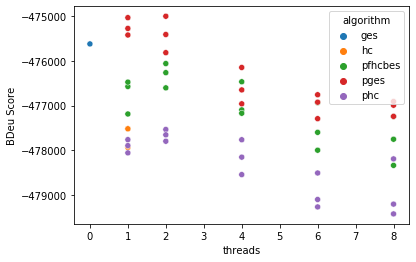

In [18]:
sns.scatterplot(data=df_prueba, x="threads", y="BDeu Score", hue="algorithm")

In [19]:
df_means['bbdd'].unique()

array(['andes.xbif50001246_', 'andes.xbif50001_', 'andes.xbif50002_',
       'andes.xbif50003_', 'andes.xbif50004_', 'andes.xbif50005_',
       'andes.xbif50006_', 'andes.xbif50007_', 'andes.xbif50008_',
       'andes.xbif50009_', 'andes.xbif_'], dtype=object)

In [20]:
df_ges = df_means.loc[df_means['algorithm'] == "ges"]
df_hc = df_means.loc[df_means['algorithm']=="hc"]

In [21]:
df_hc['interleaving'].unique()

array([ 5, 10, 15])

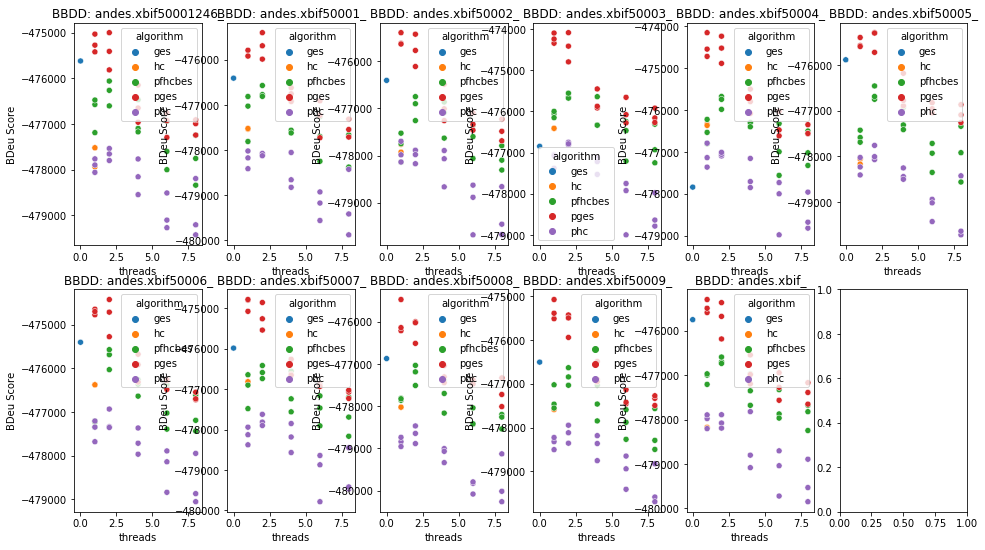

In [22]:
fig, axes = plt.subplots(2, 6, figsize=(16,9))
for i, bbdd in enumerate(df_means['bbdd'].unique()):
    #print(i)
    y = i % 6
    x = int(i / 6)
    df = df_means.loc[df_means['bbdd'] == bbdd]
    sns.scatterplot(data=df, x="threads", y="BDeu Score", hue="algorithm", ax=axes[x][y])
    axes[x][y].set_title("BBDD: " + str(bbdd))
    #plt.show()

In [23]:
def scatterplot_bbdd(df, bbdd, x, y, hue="algorithm"):
    df = df_means.loc[df_means['bbdd'] == bbdd]
    sns.scatterplot(data=df, x=x, y=y, hue=hue)#, ax=axes[x][y])

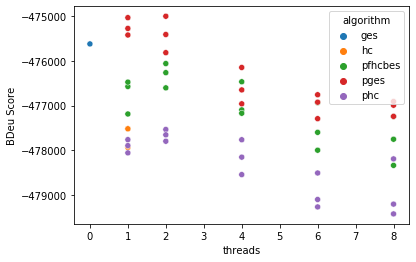

In [24]:
scatterplot_bbdd(df_means,"andes.xbif50001246_", "threads", "BDeu Score")

In [25]:
df_prueba = df_prueba.sort_values("BDeu Score", axis=0,ascending=False)

In [26]:
df_prueba.head()

bbdd algorithm  threads  interleaving    SHD  LL Score  \
22  andes.xbif50001246_      pges        2             5  168.1 -0.544305   
19  andes.xbif50001246_      pges        1             5  168.9 -0.545102   
20  andes.xbif50001246_      pges        1            10  178.4 -0.543070   
23  andes.xbif50001246_      pges        2            10  177.2 -0.544340   
21  andes.xbif50001246_      pges        1            15  175.4 -0.544590   

       BDeu Score      dfMM  dfMM plus  dfMM minus  Total iterations  \
22 -474996.567983  1.639462       25.4       340.2              37.7   
19 -475027.918907  1.650224       28.0       340.0              62.2   
20 -475270.465503  1.812556       62.6       341.6              32.9   
23 -475406.272868  1.753363       46.6       344.4              23.7   
21 -475417.559688  1.741704       49.0       339.4              24.0   

    Total time(s)  
22          324.3  
19          826.2  
20          782.2  
23          308.1  
21          777.0

In [27]:
df_means.loc[df_means["algorithm"] == "ges"]

bbdd algorithm  threads  interleaving    SHD  LL Score  \
0    andes.xbif50001246_       ges        0             0  184.0 -0.418203   
49      andes.xbif50001_       ges        0             0  187.0 -0.418732   
98      andes.xbif50002_       ges        0             0  185.0 -0.418928   
147     andes.xbif50003_       ges        0             0  193.0 -0.420137   
196     andes.xbif50004_       ges        0             0  199.0 -0.420740   
245     andes.xbif50005_       ges        0             0  187.0 -0.418573   
294     andes.xbif50006_       ges        0             0  189.0 -0.418385   
343     andes.xbif50007_       ges        0             0  189.0 -0.419027   
392     andes.xbif50008_       ges        0             0  190.0 -0.418788   
441     andes.xbif50009_       ges        0             0  184.0 -0.418802   
490          andes.xbif_       ges        0             0  173.0 -0.418193   

        BDeu Score      dfMM  dfMM plus  dfMM minus  Total iterations  \
0   -475617.345902  1.856502       72.0       342.0               0.0   
49  -476408.010054  1.829596       58.0       350.0               0.0   
98  -476412.019589  1.811659       46.0       358.0               0.0   
147 -476845.960371  1.883408       56.0       364.0               0.0   
196 -477839.100804  1.946188       82.0       352.0               0.0   
245 -475879.132967  1.820628       50.0       356.0               0.0   
294 -475402.146871  1.892377       78.0       344.0               0.0   
343 -475984.438024  1.820628       32.0       374.0               0.0   
392 -476870.191063  1.847534       72.0       340.0               0.0   
441 -476504.791635  1.838565       74.0       336.0               0.0   
490 -475749.257006  1.713004       40.0       342.0               0.0   

     Total time(s)  
0       651.466667  
49      650.000000  
98      643.466667  
147     659.600000  
196     709.200000  
245     638.533333  
294     673.066667  
343     637.333333  
392     680.533333  
441     682.666667  
490     689.333333

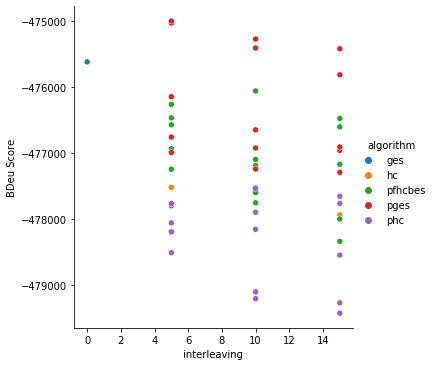

In [28]:
sns.relplot(data=df_means.loc[df_means['bbdd'] == "andes.xbif50001246_"], x="interleaving", y="BDeu Score", hue="algorithm" )

In [29]:
# PLOTS CON INTERLEAVING 5
def lineplots(df, interleaving, x="threads", y="BDeu Score"):
    #fig, axes = plt.subplots(1, 7, figsize=(16,9))
    sns.lineplot(data=df)
    
#fig.suptitle('BDeu Score mean for each thread with interleaving ' + str(5))
#for i, name in enumerate(df_threads["network"].value_counts().index):
#    #if(i == 7):
#    #    break
#    sns.lineplot(data=df_threads.loc[(df_threads["network"] == name) & (df_threads["interleaving"] == 5)], x="thread", y="BDeu Score", hue="algorithm", ax=axes[i])
#    axes[i].set_title(name)


# 3d plots

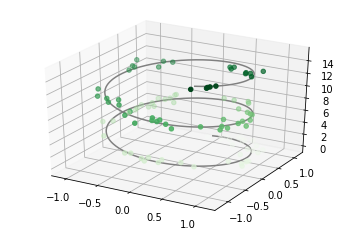

In [30]:
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')

# Data for three-dimensional scattered points
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');

In [31]:
def scatterplot3D_bbdd(df, bbdd, x_column, y_column, z_column, hue="algorithm"):
    
    # Getting df from bbdd
    df = df_means.loc[df_means['bbdd'] == bbdd]
    #sns.scatterplot(data=df, x=x, y=y, hue=hue)#, ax=axes[x][y])
    
    #PLOTTING
    
    # Color Map
    cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())

    # Figure
    fig = plt.figure(figsize=(16,9))
    ax = fig.add_subplot(projection='3d')
    sc = ax.scatter3D(df[x_column], df[y_column], df[z_column], c=df[z_column], cmap=cmap, )
    
    #Labels
    ax.set_xlabel(x_column)
    ax.set_ylabel(y_column)
    ax.set_zlabel(z_column)
    
    # Legend
    plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

    


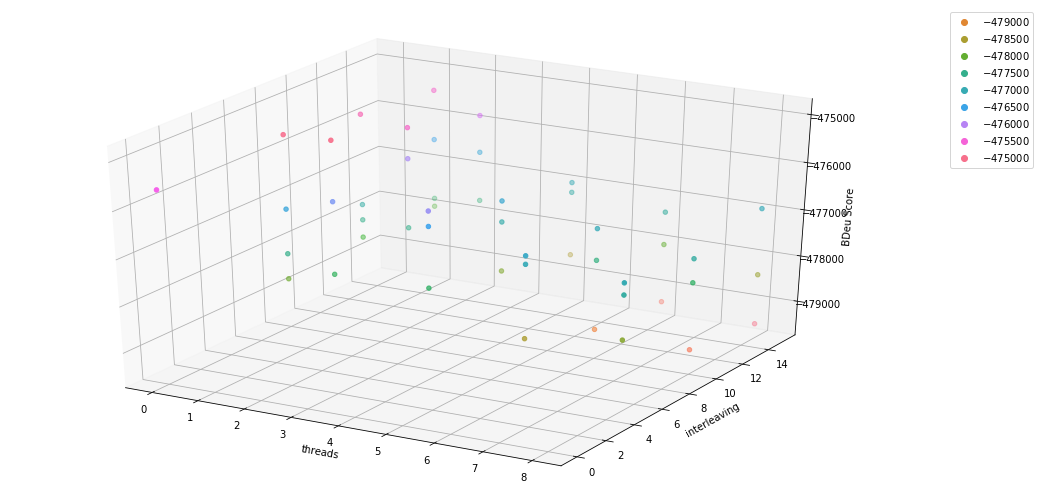

In [32]:
scatterplot3D_bbdd(df_means,"andes.xbif50001246_", "threads", "interleaving","BDeu Score")

In [33]:
# !pip install plotly==4.14.3

In [34]:
# !pip install "notebook>=5.3" "ipywidgets>=7.5"

In [35]:
import plotly.express as px

def scatterplotly3D_bbdd(df, bbdd, x, y, z, color="algorithm"):
    fig = px.scatter_3d(df.loc[df['bbdd'] == bbdd], x=x, y=y, z=z, color=color, title=z + " for " + bbdd +" database")
    fig.show()

def scatterplotly3D(df, x, y, z, color="algorithm"):
    fig = px.scatter_3d(df, x=x, y=y, z=z, color=color, title=z + " for all databases in andes")
    fig.show()



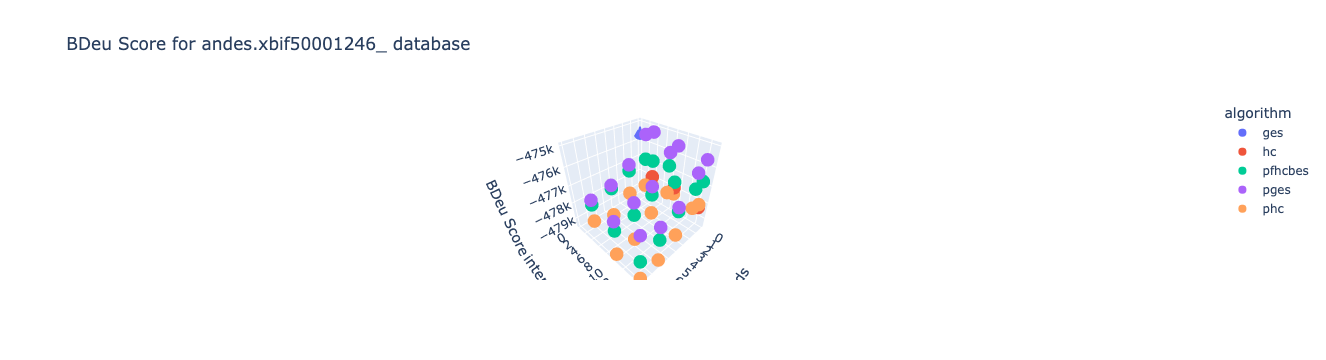

In [36]:
scatterplotly3D_bbdd(df_means, "andes.xbif50001246_", "threads", "interleaving", "BDeu Score")

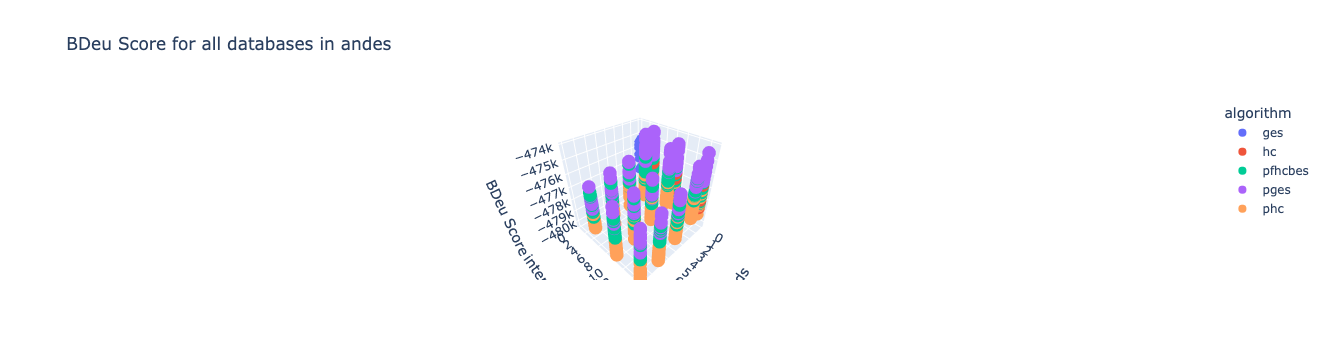

In [37]:
scatterplotly3D(df_means, "threads", "interleaving", "BDeu Score")

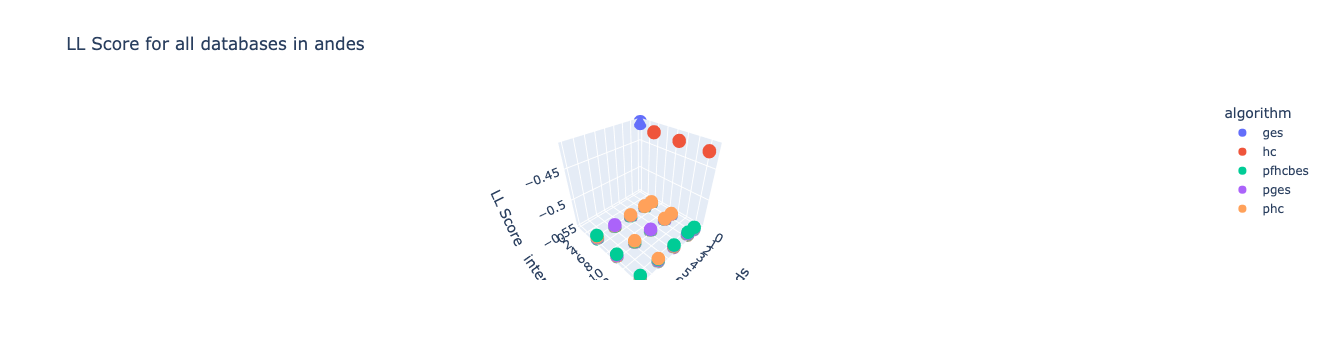

In [38]:
scatterplotly3D(df_means, "threads", "interleaving", "LL Score")

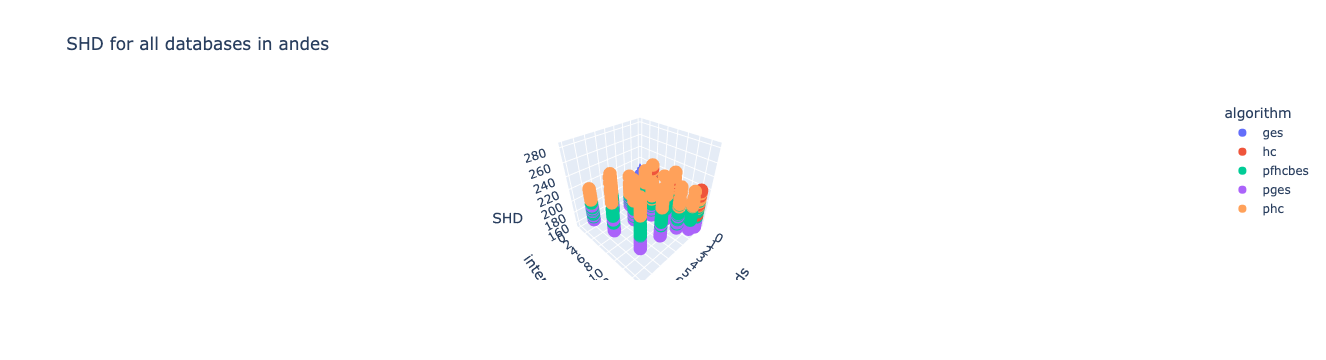

In [39]:
scatterplotly3D(df_means, "threads", "interleaving", "SHD")

In [40]:
df_means.columns

Index(['bbdd', 'algorithm', 'threads', 'interleaving', 'SHD', 'LL Score',
       'BDeu Score', 'dfMM', 'dfMM plus', 'dfMM minus', 'Total iterations',
       'Total time(s)'],
      dtype='object')

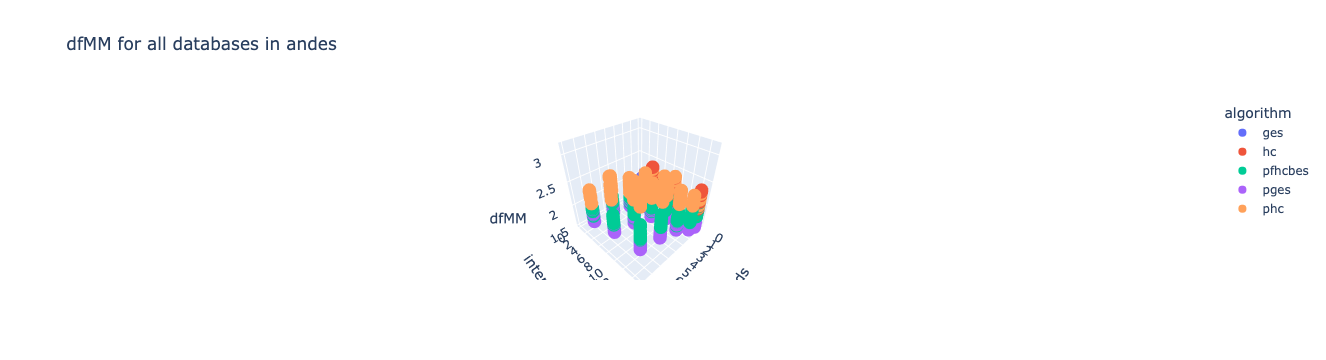

In [41]:
scatterplotly3D(df_means, "threads", "interleaving", "dfMM")

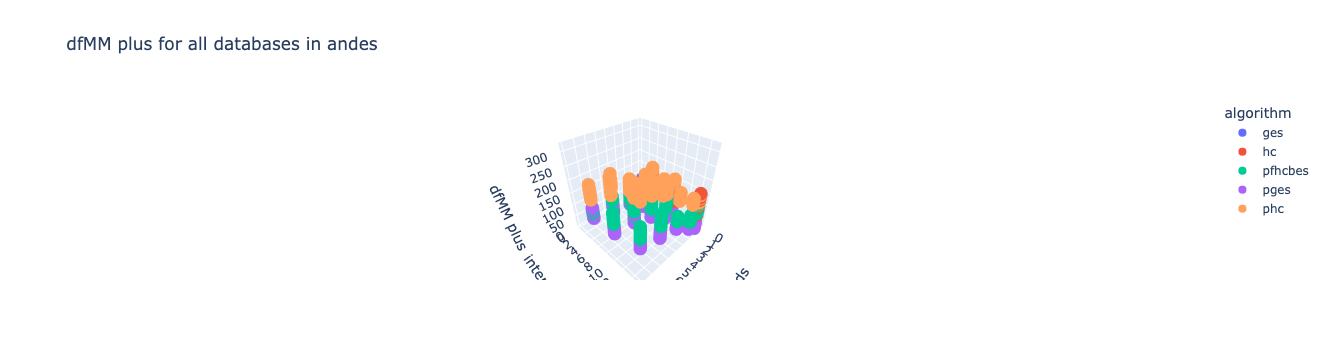

In [42]:
scatterplotly3D(df_means, "threads", "interleaving", "dfMM plus")

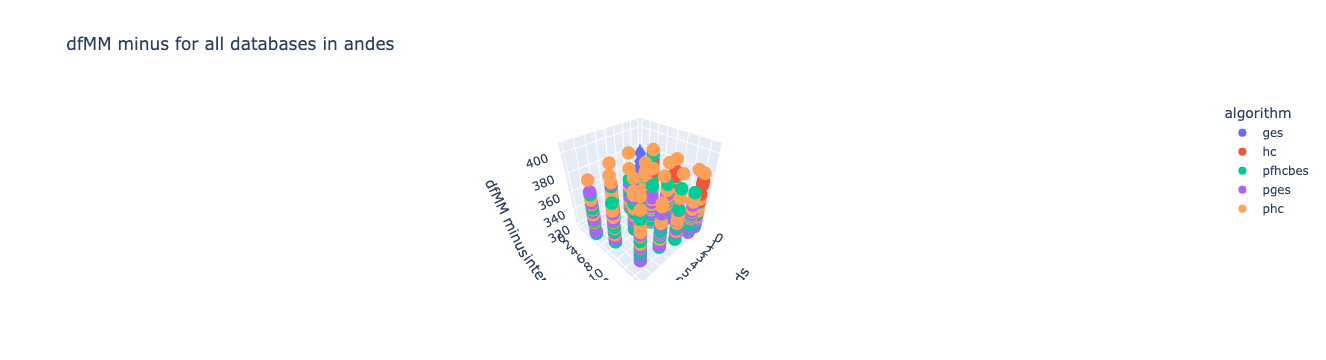

In [43]:
scatterplotly3D(df_means, "threads", "interleaving", "dfMM minus")

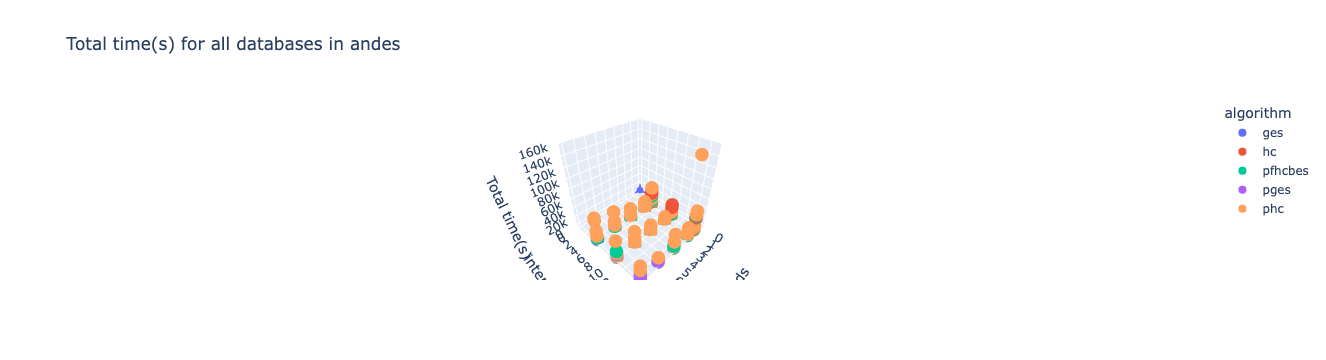

In [44]:
scatterplotly3D(df_means, "threads", "interleaving", "Total time(s)")

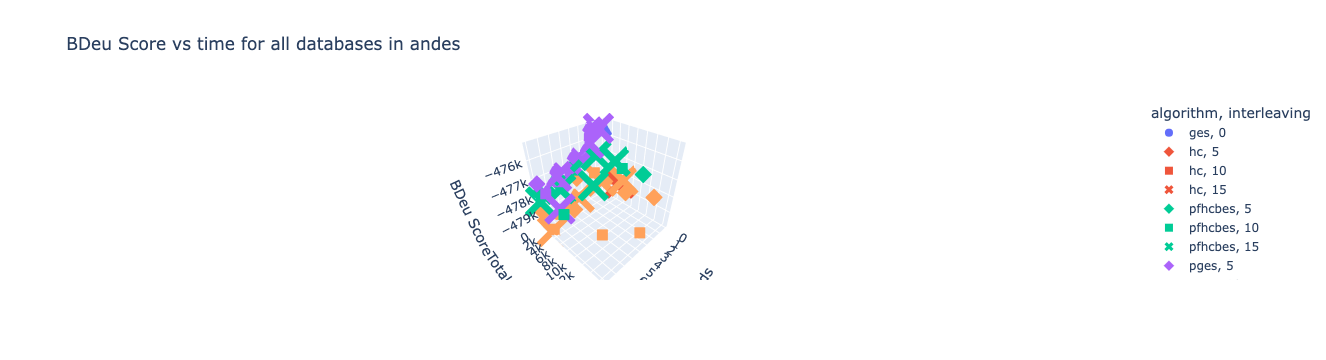

In [45]:
fig = px.scatter_3d(df_means.loc[df_means['bbdd'] == 'andes.xbif_'], x="threads", y="Total time(s)", z="BDeu Score", color="algorithm", symbol="interleaving", title="BDeu Score vs time for all databases in andes")
fig.show()

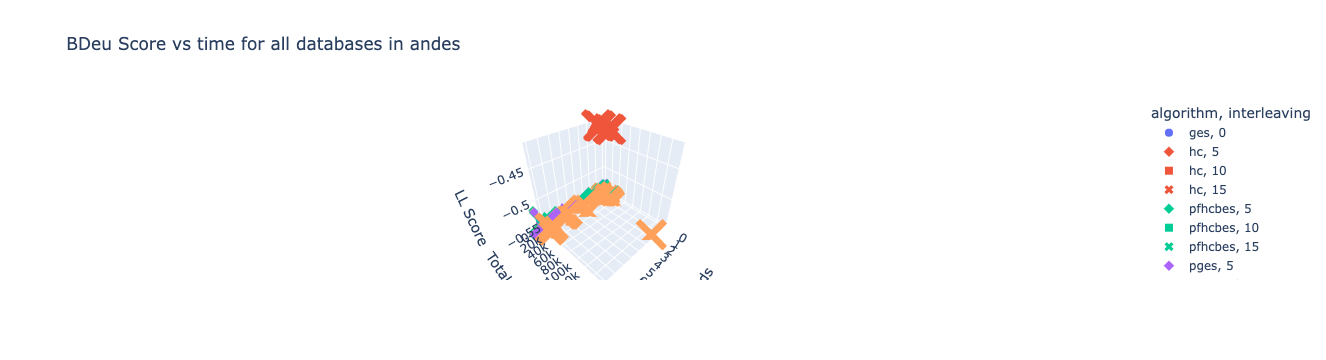

In [46]:
fig = px.scatter_3d(df_means, x="threads", y="Total time(s)", z="LL Score", color="algorithm", symbol="interleaving", title="BDeu Score vs time for all databases in andes")
fig.show()

In [ ]:
?px.scatter_3d